In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pandasql import sqldf
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from tabulate import tabulate
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import hyperopt.pyll
from hyperopt.pyll import scope
from hpsklearn import HyperoptEstimator

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from category_encoders.ordinal import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.one_hot import OneHotEncoder


ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [146]:
df = pd.read_csv(r"/home/lumkile/django-projects/insurance/fraudDetection/clients/fraud.csv")

print('The data constain ', len(df),' observations.')
df.head()

The data constain  15420  observations.


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [65]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [66]:
#Tried using the loop below to check for unique values, it appears that all features are being 
#interpreted as series data. Haven't figured out how to pull values from series. 
#I resorted to printing each individually and inspecting the results.

#for i in df.columns:
#    print(i)
#    print(' ')
#    print('Unique values of {}'.format(i), df[str(i)].unique)
    
print('Month',df['Month'].unique())
print('WeekOfMonth',df['WeekOfMonth'].unique())
print('DayOfWeek',df['DayOfWeek'].unique())
print('Make',df['Make'].unique())
print('AccidentArea',df['AccidentArea'].unique())
print('DayOfWeekClaimed',df['DayOfWeekClaimed'].unique())
print('MonthClaimed',df['MonthClaimed'].unique())
print('WeekOfMonthClaimed',df['WeekOfMonthClaimed'].unique())
print('Sex',df['Sex'].unique())
print('MaritalStatus',df['MaritalStatus'].unique())
print('Age',df['Age'].unique())
print('Fault',df['Fault'].unique())
print('PolicyType',df['PolicyType'].unique())
print('VehicleCategory',df['VehicleCategory'].unique())
print('VehiclePrice',df['VehiclePrice'].unique())
print('FraudFound_P',df['FraudFound_P'].unique())
print('PolicyNumber',df['PolicyNumber'].unique())
print('RepNumber',df['RepNumber'].unique())
print('Deductible',df['Deductible'].unique())
print('DriverRating',df['DriverRating'].unique())
print('Days_Policy_Accident', df['Days_Policy_Accident'].unique())
print('Days_Policy_Claim',df['Days_Policy_Claim'].unique())
print('PastNumberOfClaims',df['PastNumberOfClaims'].unique())
print('AgeOfVehicle',df['AgeOfVehicle'].unique())
print('AgeOfPolicyHolder',df['AgeOfPolicyHolder'].unique())
print('PoliceReportFiled',df['PoliceReportFiled'].unique())
print('WitnessPresent',df['WitnessPresent'].unique())
print('AgentType',df['AgentType'].unique())
print('NumberOfSuppliments',df['NumberOfSuppliments'].unique())
print('AddressChange_Claim',df['AddressChange_Claim'].unique())
print('NumberOfCars',df['NumberOfCars'].unique())
print('Year',df['Year'].unique())
print('BasePolicy',df['BasePolicy'].unique())

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth [5 3 2 4 1]
DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea ['Urban' 'Rural']
DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed [1 4 2 3 5]
Sex ['Female' 'Male']
MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']
Age [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault ['Policy Holder' 'Third Party']
PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'


In [67]:

print(df)

      Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  .

In [68]:
titles=list(df.columns)
titles

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

In [69]:
titles[15],titles[32]=titles[32],titles[15]
titles

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'BasePolicy',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'FraudFound_P']

In [70]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [71]:
df=df[titles]
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,1
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,1
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,0


In [72]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
BasePolicy              object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
FraudFou

In [73]:
df = df.drop('BasePolicy', 1)

/tmp/ipykernel_3592/3160358692.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('BasePolicy', 1)


In [74]:
df = df.drop('NumberOfSuppliments', 1)

/tmp/ipykernel_3592/295147800.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('NumberOfSuppliments', 1)


In [75]:
df = df.drop('Days_Policy_Claim', 1)

/tmp/ipykernel_3592/3700329169.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Days_Policy_Claim', 1)


In [76]:
df = df.drop('PastNumberOfClaims', 1)

/tmp/ipykernel_3592/4291989132.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('PastNumberOfClaims', 1)


In [77]:
df = df.drop('AgeOfPolicyHolder', 1)

/tmp/ipykernel_3592/2513714167.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('AgeOfPolicyHolder', 1)


In [78]:
df = df.drop('AddressChange_Claim', 1)

/tmp/ipykernel_3592/4095934237.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('AddressChange_Claim', 1)


In [79]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
AgeOfVehicle            object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfCars            object
Year                     int64
FraudFound_P             int64
dtype: object

In [80]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,Deductible,DriverRating,Days_Policy_Accident,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,Year,FraudFound_P
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,300,1,more than 30,3 years,No,No,External,3 to 4,1994,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,400,4,more than 30,6 years,Yes,No,External,1 vehicle,1994,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,400,3,more than 30,7 years,No,No,External,1 vehicle,1994,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,400,2,more than 30,more than 7,Yes,No,External,1 vehicle,1994,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,400,1,more than 30,5 years,No,No,External,1 vehicle,1994,0


In [81]:
print(df['PolicyNumber'].sum())
print((len(df['PolicyNumber'])*(len(df['PolicyNumber']) +1 ))/2 )
df['PolicyNumber']

118895910
118895910.0


0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [82]:
#Investigate the 0 in DayOfWeekClaimed and MonthClaimed
print('DayOfWeekClaimed has ', len(df.loc[(df['DayOfWeekClaimed']=='0')]), ' row(s) with a 0')
print('MonthClaimed has ',len(df.loc[(df['MonthClaimed']=='0')]),' row(s) with a 0') 
print(' ')

#We see there is only one row where either the DayOfWeekClaimed or MonthClaimed are 0. 
#So now we compare them.
print(df.loc[(df['DayOfWeekClaimed']=='0')])
print(df.loc[(df['MonthClaimed']=='0')])

# Both are zero in the same row (row 1516). 

DayOfWeekClaimed has  1  row(s) with a 0
MonthClaimed has  1  row(s) with a 0
 
     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  Deductible  \
1516            0                   1  Male        Single  ...         400   

     DriverRating Days_Policy_Accident AgeOfVehicle PoliceReportFiled  \
1516            2         more than 30          new                No   

      WitnessPresent  AgentType  NumberOfCars  Year FraudFound_P  
1516              No   External     1 vehicle  1994            0  

[1 rows x 27 columns]
     Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
1516   Jul            2    Monday  Honda        Rural                0   

     MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  Deductible  \
1516            0                   1  Male        Single  ...         400   

    

In [83]:
#Since both DayOfWeekClaimed and MonthClaimed are 0 for the same entry, I will drop
df2 = df.loc[df['DayOfWeekClaimed']!='0']

In [84]:
#Resets the index on our new dataframe, df2, so we can iterate through the rows
#If we didn't do this, attempting to access df2.loc[1516] would throw a keyerror
#This suggests that df2 does not have a row 1516, which is just plain silly
df2.reset_index(drop=True, inplace=True)
len(df2)

15419

In [85]:
#There are 319 rows where the feature Age is assigned a zero, 
print(len(df2[df2['Age']==0]))

#though for the displayed rows the policy holder is said to be between 16 and 17 years old. 
#df2.loc[df2['Age']==0, 'AgeOfPolicyHolder']

#Need to check the policy holders age and then reassign a value.
df2_age0_idx = (df2['Age']==0)


319


In [86]:
#confirms that every row with Age=0, has a Policy Holder that is aged between 16 and 17 years.
df2['Age']==0
#print('Age',df['Age'].unique())

0        False
1        False
2        False
3        False
4        False
         ...  
15414    False
15415    False
15416    False
15417    False
15418    False
Name: Age, Length: 15419, dtype: bool

In [87]:
#Assigns an age of 16 to all rows with missing Age values
df2.loc[list(df2_age0_idx),'Age']=18

In [88]:
#Assigns an age of 16 to all rows with missing Age values
df2.loc[list(df2_age0_idx),'Age']=16

In [89]:
#Confirms that there are no Ages equal to 0.
print(df2['Age'].unique()==0)
len(df2[df2['Age']==0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


0

In [90]:
#Since the length of the df2 is the same as the df2.drop_duplicates, this tells us
#there are no duplicate rows
print(len(df2.drop_duplicates())==len(df2))

True


In [91]:
df2_chi_result=[]
for feat in df2.columns:
    chi2_val, p_val, dof2, ex1 = stats.chi2_contingency(pd.crosstab(df2[feat], df2['FraudFound_P']))
    df2_chi_result.append([feat,chi2_val,p_val])
    
chi_df = pd.DataFrame(df2_chi_result, columns=['Features', 'Chi2 val', 'p-val'])
chi_df.sort_values(by='p-val',ascending=True, inplace=True)    
#Printing on the variables that had a p-val less than 0.05
print(tabulate(chi_df[chi_df['p-val']<0.05], headers=['Feature', 'Chi2 val', 'p-val']))

    Feature                  Chi2 val        p-val
--  --------------------  -----------  -----------
26  FraudFound_P          15401.2      0
12  PolicyType              437.491    1.76844e-89
13  VehicleCategory         290.981    6.52082e-64
11  Fault                   264.985    1.40618e-59
17  Deductible               72.4063   1.30283e-15
14  VehiclePrice             67.8361   2.88832e-13
 3  Make                     59.8153   2.19157e-06
 6  MonthClaimed             42.2005   1.49524e-05
 4  AccidentArea             16.9019   3.9363e-05
 8  Sex                      13.4957   0.000239114
10  Age                     109.635    0.00033628
 0  Month                    29.7715   0.0017209
20  AgeOfVehicle             21.9951   0.00254532
23  AgentType                 7.38047  0.0065936
25  Year                      9.59259  0.00826031
19  Days_Policy_Accident     11.5698   0.0208538


,PolicyType,FraudFound_P,Total Accidents,Percentage by PolicyType,Percentage by Total
0,Sedan - All Perils,411,4086,10.059,2.666
1,Sedan - Collision,384,5584,6.877,2.49
2,Sedan - Liability,36,4987,0.722,0.233
3,Sport - All Perils,0,22,0.0,0.0
4,Sport - Collision,48,348,13.793,0.311
5,Sport - Liability,0,1,0.0,0.0
6,Utility - All Perils,41,340,12.059,0.266
7,Utility - Collision,3,30,10.0,0.019
8,Utility - Liability,0,21,0.0,0.0
9,Column total,923,15419,53.51,5.985


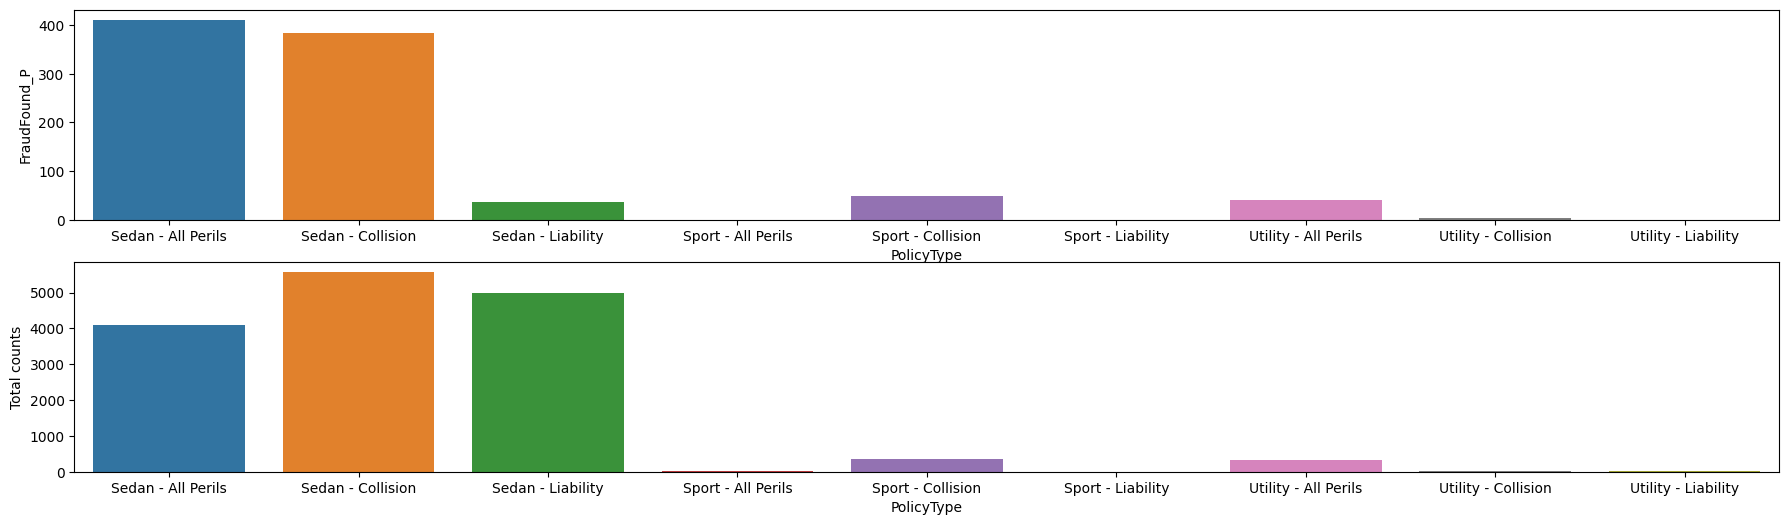

In [92]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('PolicyType').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('PolicyType').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='PolicyType', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='PolicyType', y='FraudFound_P', data=gpd_val2, ax=ax2)

ax2.set(ylabel='Total counts')

None

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by PolicyType']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by PolicyType'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'PolicyType',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by PolicyType',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)


    Fault            FraudFound_P    Total Accidents    Percentage by Fault    Percentage by Total
--  -------------  --------------  -----------------  ---------------------  ---------------------
 0  Policy Holder             886              11229                  7.89                   5.746
 1  Third Party                37               4190                  0.883                  0.24
 2  Column total              923              15419                  8.773                  5.986
 
    Deductible      FraudFound_P    Total Accidents    Percentage by Deductible    Percentage by Total
--  ------------  --------------  -----------------  --------------------------  ---------------------
 0  300                        2                  8                      25                      0.013
 1  400                      856              14837                       5.769                  5.552
 2  500                       47                263                      17.871             

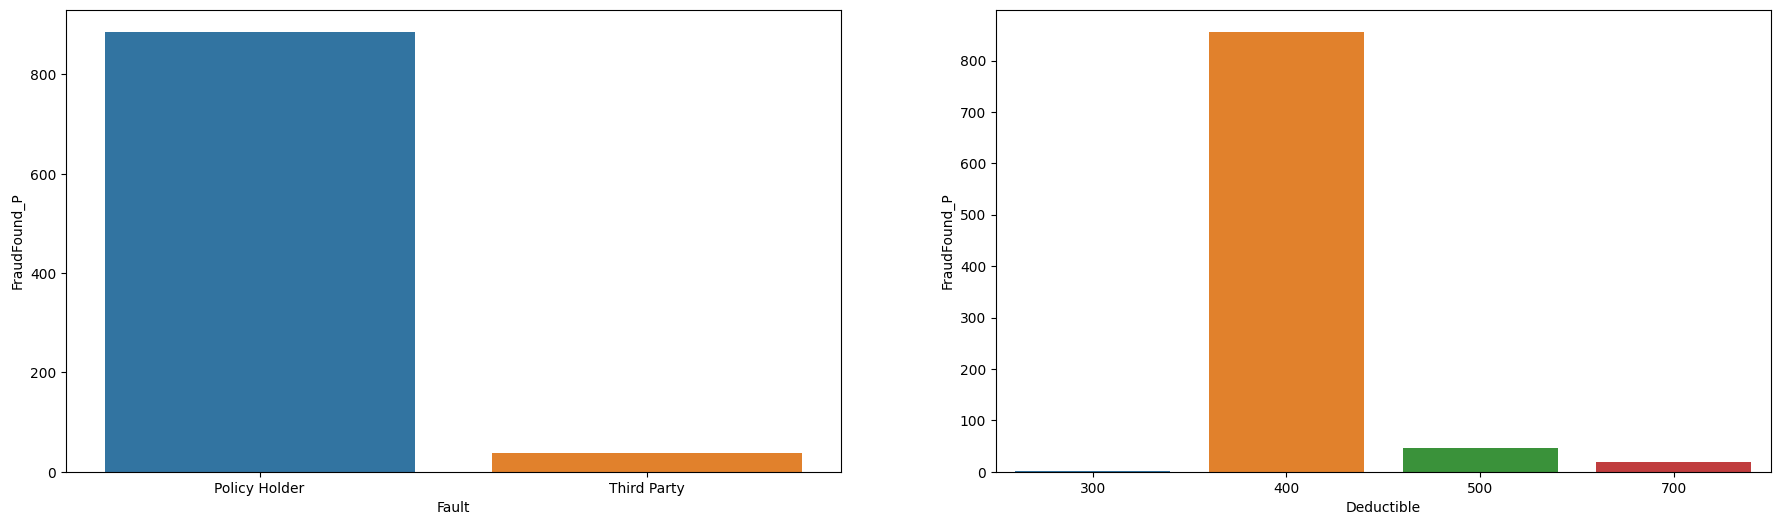

In [93]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('Fault').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('Deductible').agg({'FraudFound_P':'sum'}).reset_index()
#gpd_val3=df2.groupby('AddressChange_Claim').agg({'FraudFound_P':'sum'}).reset_index()

gpd_valc1=df2.groupby('Fault').agg('count').reset_index()
gpd_valc2=df2.groupby('Deductible').agg('count').reset_index()
#gpd_valc3=df2.groupby('AddressChange_Claim').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(22, 6))
sns.barplot(x='Fault', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='Deductible', y='FraudFound_P', data = gpd_val2, ax=ax2)
#sns.barplot(x='AddressChange_Claim', y='FraudFound_P', data = gpd_val3, ax=ax2)

part_list=[gpd_val1, gpd_val2]
counts_lst=[gpd_valc1,gpd_valc2]
srch_gp=['Fault','Deductible']
total_list=[]
for i in range(len(counts_lst)):
    temp1 = counts_lst[i]
    gby=srch_gp[i]
    temp2=  pd.concat([part_list[i], temp1['FraudFound_P'].rename('Total Accidents')],axis=1) 
    temp2['Percentage by {}'.format(gby)]= round((temp2['FraudFound_P']/temp2['Total Accidents'])*100,3)
    temp2['Percentage by Total'] = round((temp2['FraudFound_P']/sum(temp2['Total Accidents']))*100,3)
    
    temp3 = [['Column total'],
        [sum(temp2['FraudFound_P'])], 
        [sum(temp2['Total Accidents'])], 
        [sum(temp2['Percentage by {}'.format(gby)])], 
        [sum(temp2['Percentage by Total'])]]

    nr1 = pd.DataFrame(temp3)
    nr1 = nr1.transpose()
    nr1.rename(columns={0:'{}'.format(gby),1:'FraudFound_P',2:'Total Accidents',3:'Percentage by {}'.format(gby),4:'Percentage by Total'}, inplace=True)
    total_list.append(pd.concat([temp2,nr1],ignore_index=True))

for ii in range(len(total_list)):
    print(tabulate(total_list[ii], headers=total_list[ii].columns))
    print(' ')

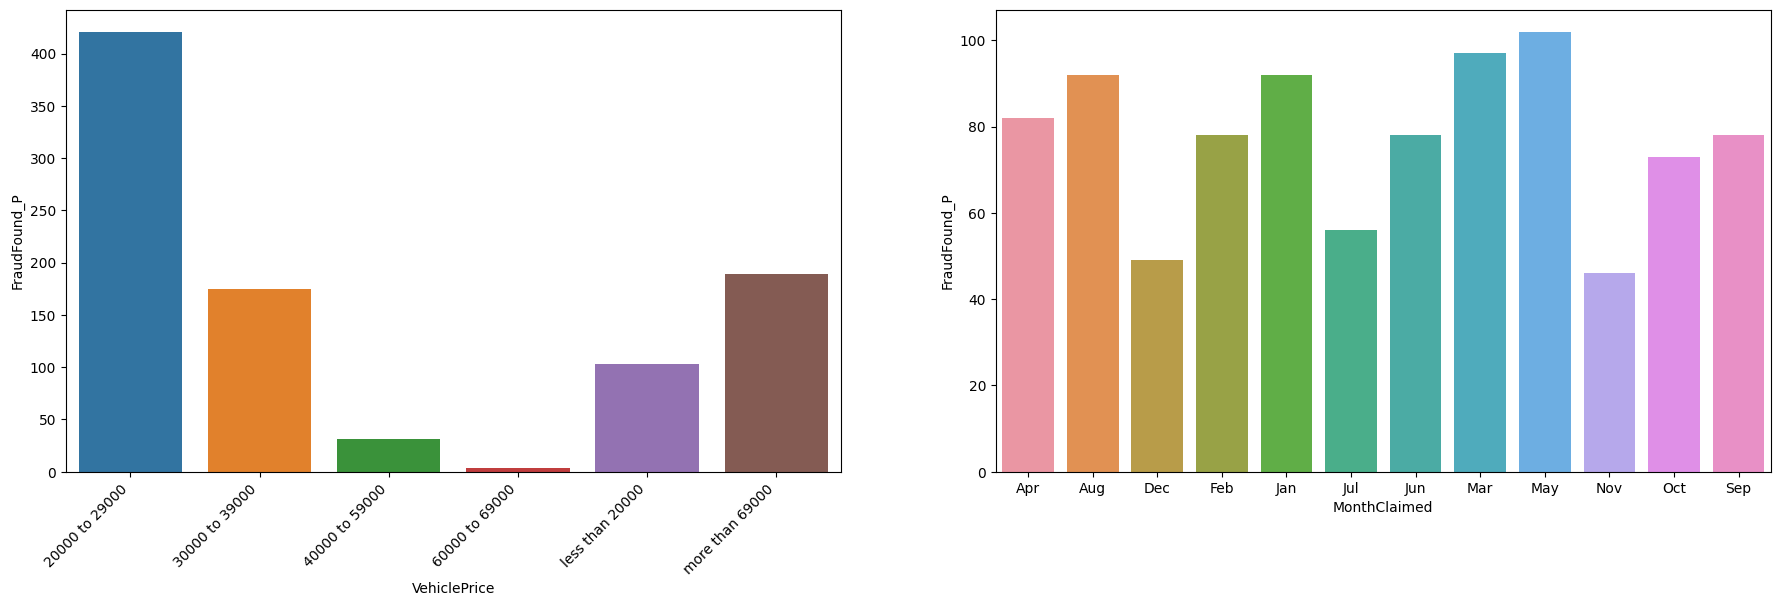

In [94]:
#VehiclePrice,  MonthCalimed
gpd_val1=df2.groupby('VehiclePrice').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('MonthClaimed').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax3) = plt.subplots(1,2,figsize=(22, 6))
grph1=sns.barplot(x='VehiclePrice', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='MonthClaimed', y='FraudFound_P', data = gpd_val3, ax=ax3)

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
None

,Make,FraudFound_P,Total Accidents,Percentage by Make,Percentage by Total
0,Accura,59,472,12.5,0.383
1,BMW,1,15,6.667,0.006
2,Chevrolet,94,1681,5.592,0.61
3,Dodge,2,109,1.835,0.013
4,Ferrari,0,2,0.0,0.0
5,Ford,33,450,7.333,0.214
6,Honda,179,2800,6.393,1.161
7,Jaguar,0,6,0.0,0.0
8,Lexus,0,1,0.0,0.0
9,Mazda,123,2354,5.225,0.798


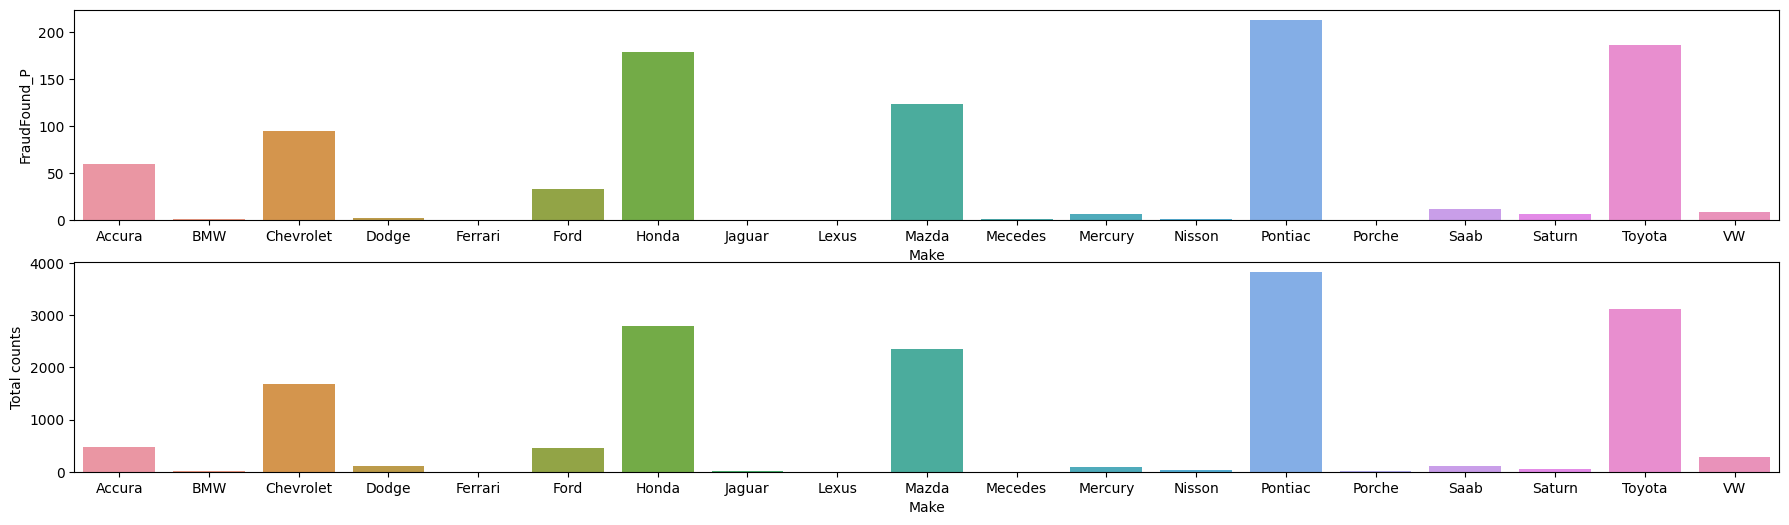

In [95]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('Make').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('Make').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 6))
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val1,ax=ax1)
sns.barplot(x='Make', y='FraudFound_P', data = gpd_val2,ax=ax2)

total_list = pd.concat([gpd_val1, gpd_val2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by Make']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by Make'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'Make',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by Make',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)
                   
#print(tabulate(total_list, headers=total_list.columns))
                   
                   

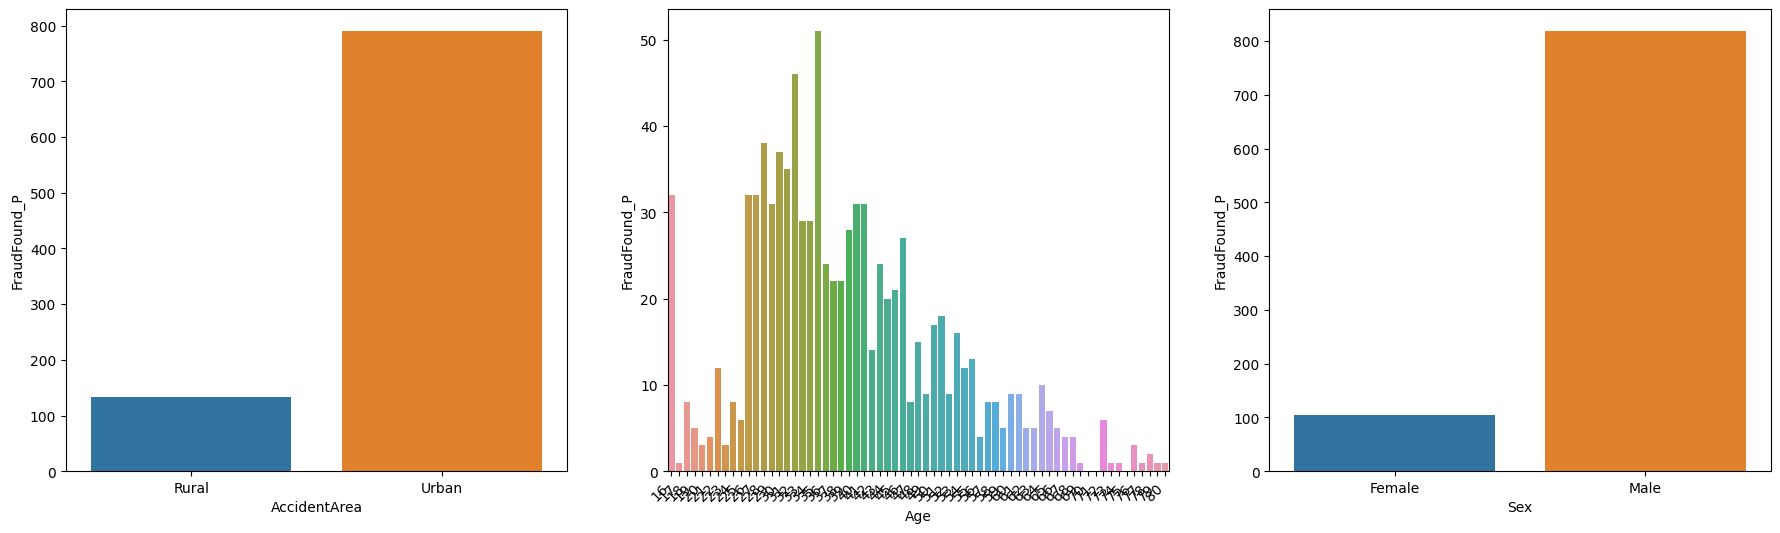

In [96]:
#AccidentArea, AgeOfPolicyHolder, Sex
gpd_val1=df2.groupby('AccidentArea').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('Sex').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 6))
sns.barplot(x='AccidentArea', y='FraudFound_P', data = gpd_val1, ax=ax1)
grph2 = sns.barplot(x='Age', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='Sex', y='FraudFound_P', data = gpd_val3, ax=ax3)

grph2.set_xticklabels(grph2.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
None

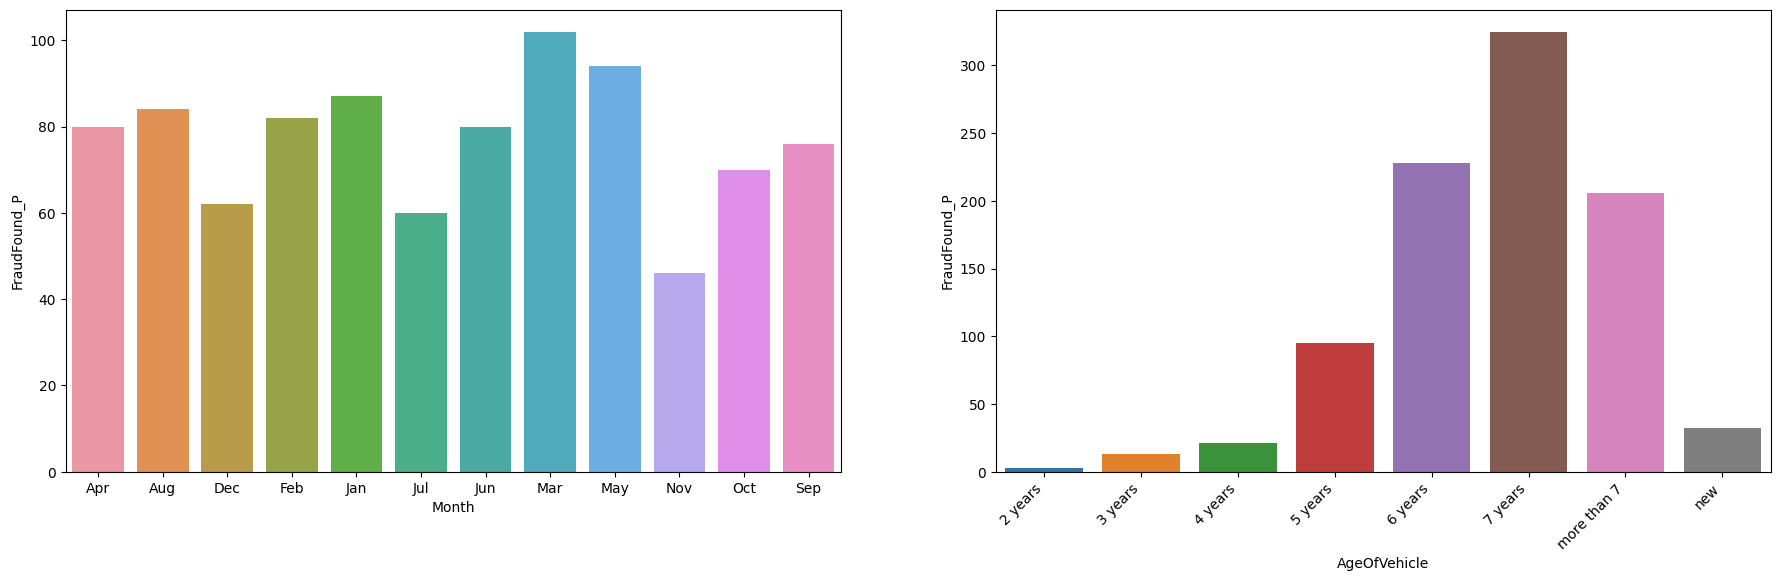

In [97]:
#Month, AgeOfVehicle
gpd_val2=df2.groupby('Month').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('AgeOfVehicle').agg({'FraudFound_P':'sum'}).reset_index()

fig, (ax2,ax3) = plt.subplots(1,2,figsize=(22, 6))
sns.barplot(x='Month', y='FraudFound_P', data = gpd_val2, ax=ax2)
grph1 = sns.barplot(x='AgeOfVehicle', y='FraudFound_P', data = gpd_val3, ax=ax3)

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
None

923


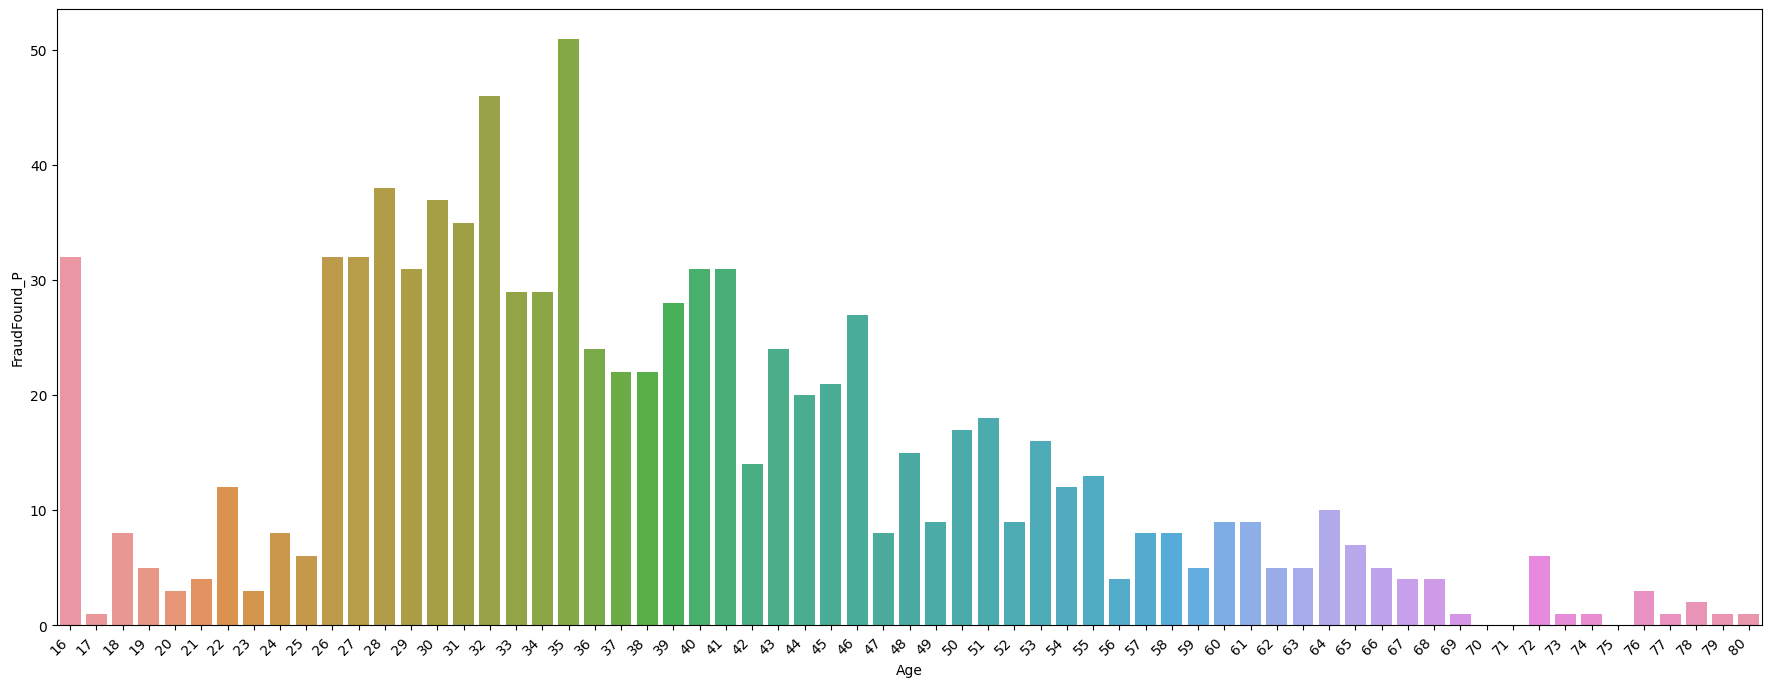

In [98]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('Age').agg({'FraudFound_P':'sum'}).reset_index()
print(gpd_val1['FraudFound_P'].sum())

fig, (ax1) = plt.subplots(1,1,figsize=(22, 8))
grph1=sns.barplot(x='Age', y='FraudFound_P', data = gpd_val1, ax=ax1)

grph1.set_xticklabels(grph1.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                    )
None

<AxesSubplot:xlabel='Days_Policy_Accident', ylabel='FraudFound_P'>

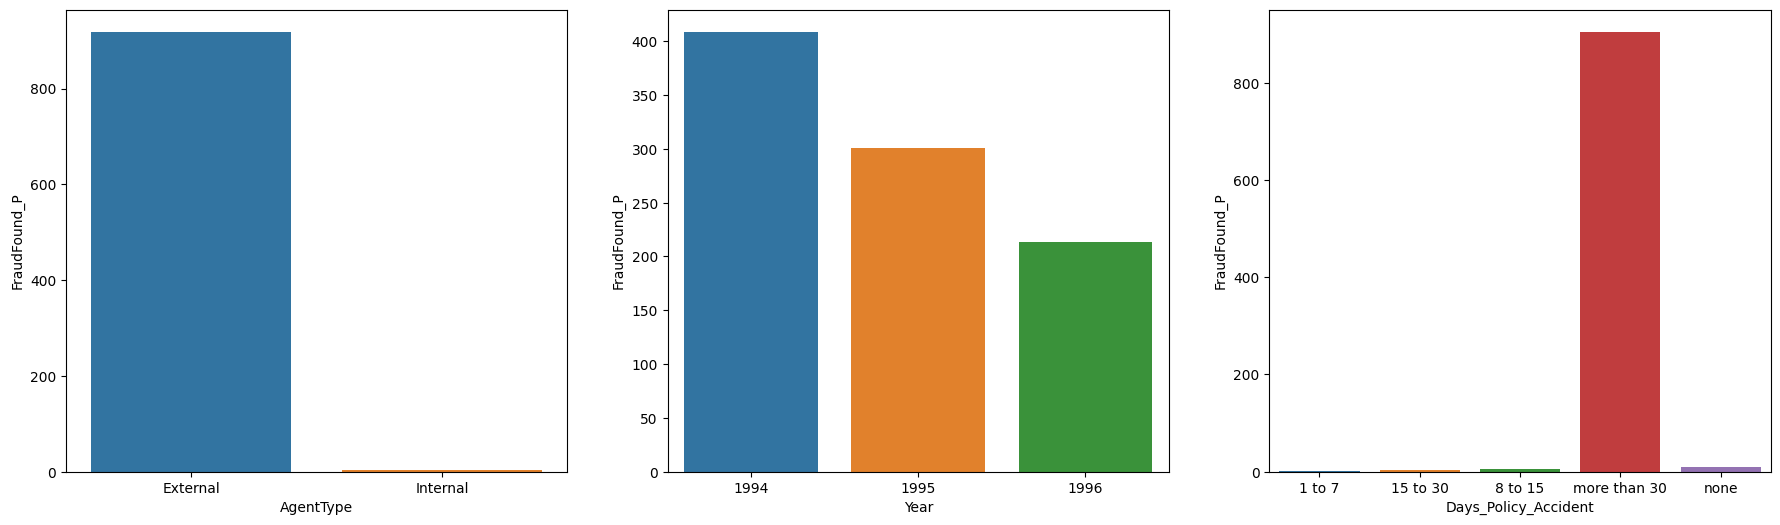

In [99]:
#AgentType, Year, Days_Policy_Accident
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('AgentType').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('Year').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('Days_Policy_Accident').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 6))
sns.barplot(x='AgentType', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='Year', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', data = gpd_val3, ax=ax3)

<AxesSubplot:xlabel='DayOfWeek', ylabel='FraudFound_P'>

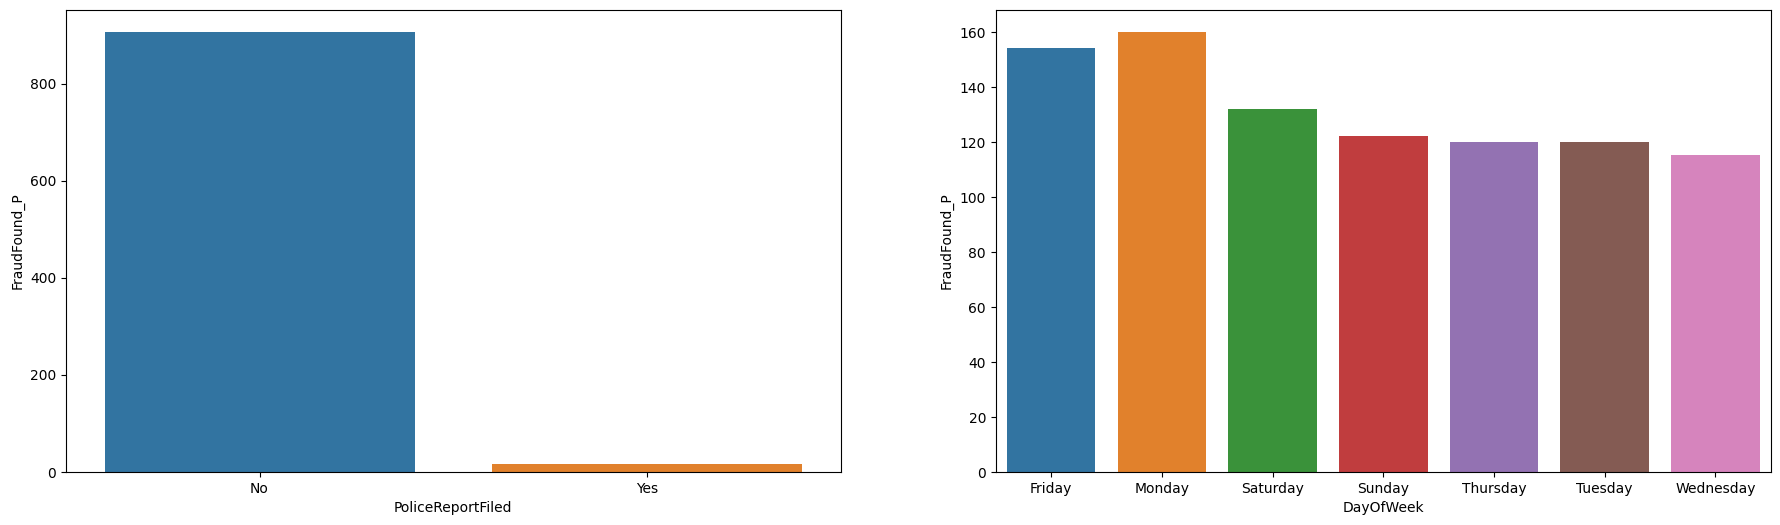

In [100]:
#PoliceReportFiled, Days_Policy_Claim, DayOfWeek
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('PoliceReportFiled').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('DayOfWeek').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(22, 6))
sns.barplot(x='PoliceReportFiled', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='DayOfWeek', y='FraudFound_P', data = gpd_val2, ax=ax2)

<AxesSubplot:xlabel='DayOfWeekClaimed', ylabel='FraudFound_P'>

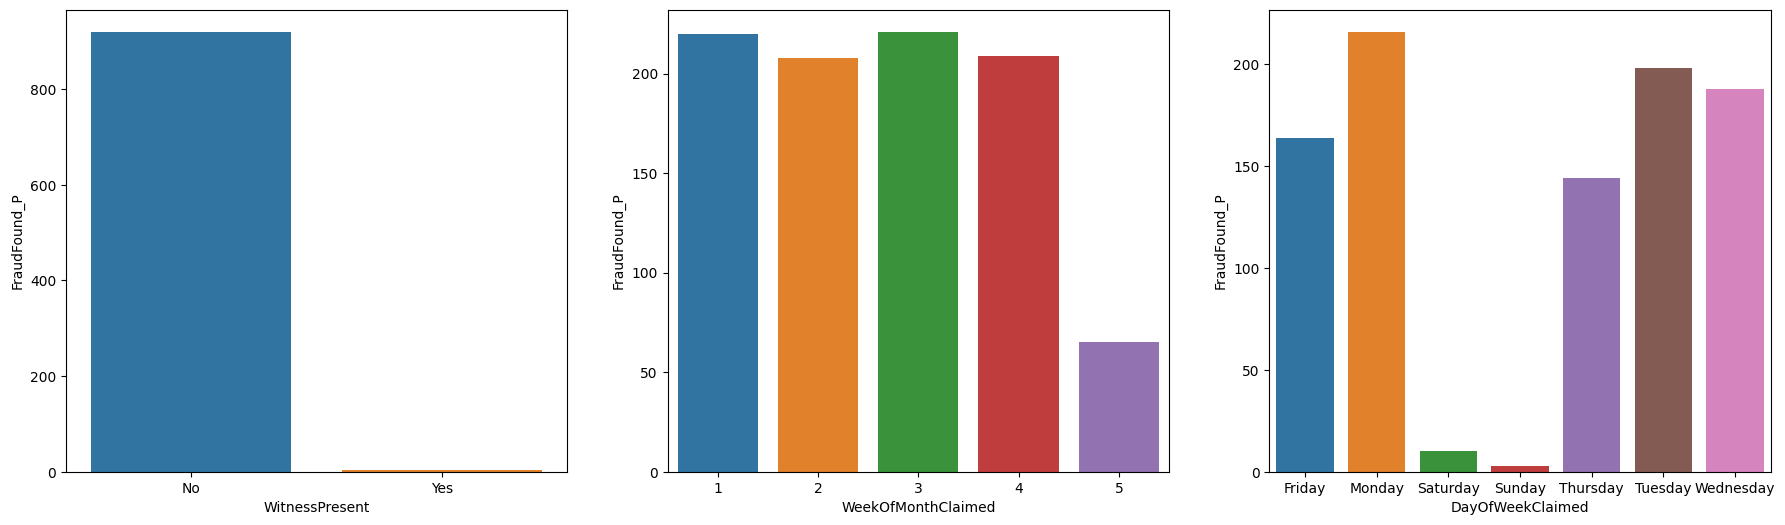

In [101]:
#WitnessPresent, WeekOfMonthClaimed, DayOfWeekClaimed
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('WitnessPresent').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('WeekOfMonthClaimed').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('DayOfWeekClaimed').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 6))
sns.barplot(x='WitnessPresent', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='WeekOfMonthClaimed', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='DayOfWeekClaimed', y='FraudFound_P', data = gpd_val3, ax=ax3)

<AxesSubplot:xlabel='NumberOfCars', ylabel='FraudFound_P'>

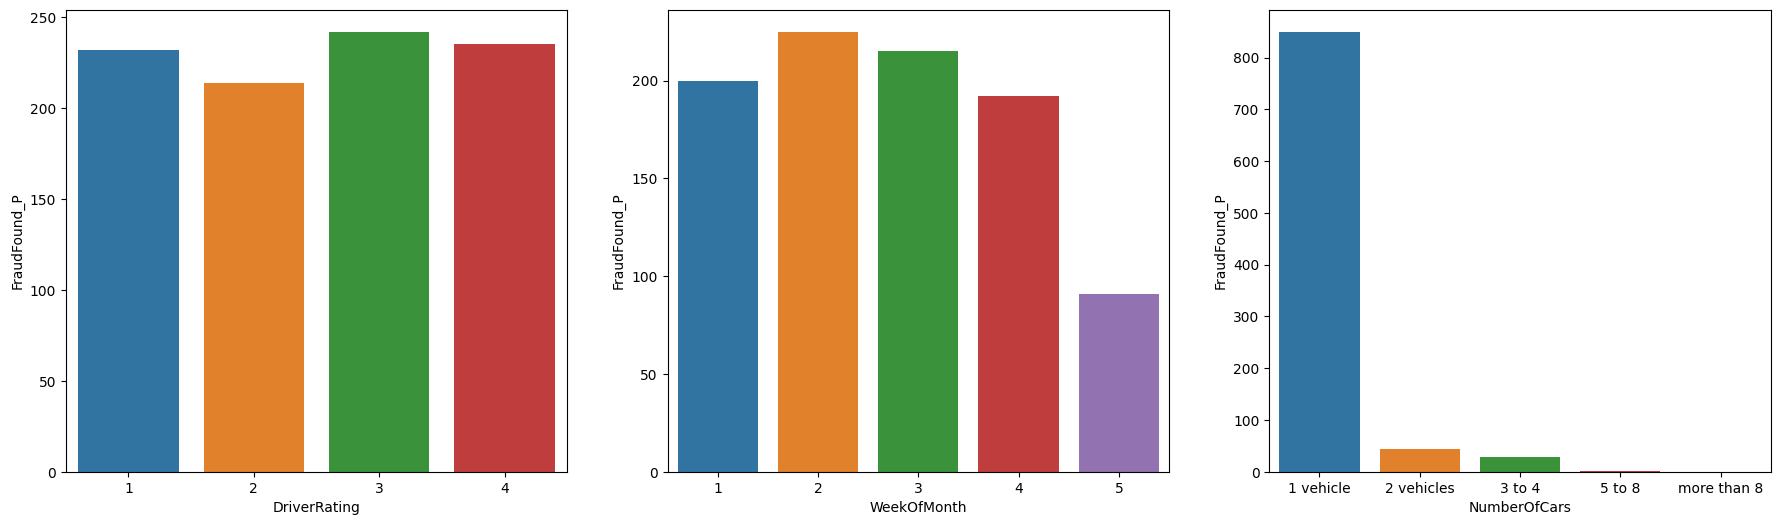

In [102]:
#DriverRating, WeekOfMonth, NumberOfCars
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('DriverRating').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('WeekOfMonth').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('NumberOfCars').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 6))
sns.barplot(x='DriverRating', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='WeekOfMonth', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='NumberOfCars', y='FraudFound_P', data = gpd_val3, ax=ax3)

<AxesSubplot:xlabel='NumberOfCars', ylabel='FraudFound_P'>

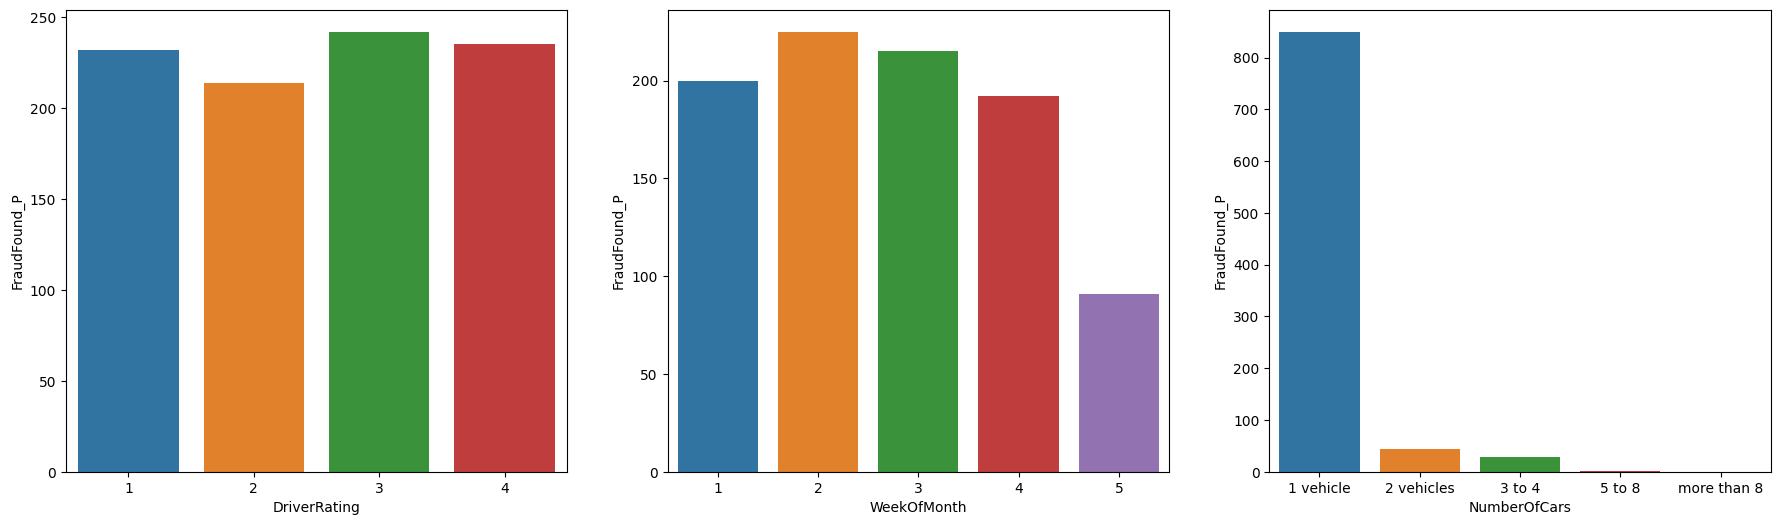

In [103]:
#DriverRating, WeekOfMonth, NumberOfCars
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('DriverRating').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val2=df2.groupby('WeekOfMonth').agg({'FraudFound_P':'sum'}).reset_index()
gpd_val3=df2.groupby('NumberOfCars').agg({'FraudFound_P':'sum'}).reset_index()


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22, 6))
sns.barplot(x='DriverRating', y='FraudFound_P', data = gpd_val1, ax=ax1)
sns.barplot(x='WeekOfMonth', y='FraudFound_P', data = gpd_val2, ax=ax2)
sns.barplot(x='NumberOfCars', y='FraudFound_P', data = gpd_val3, ax=ax3)

<AxesSubplot:xlabel='MaritalStatus', ylabel='FraudFound_P'>

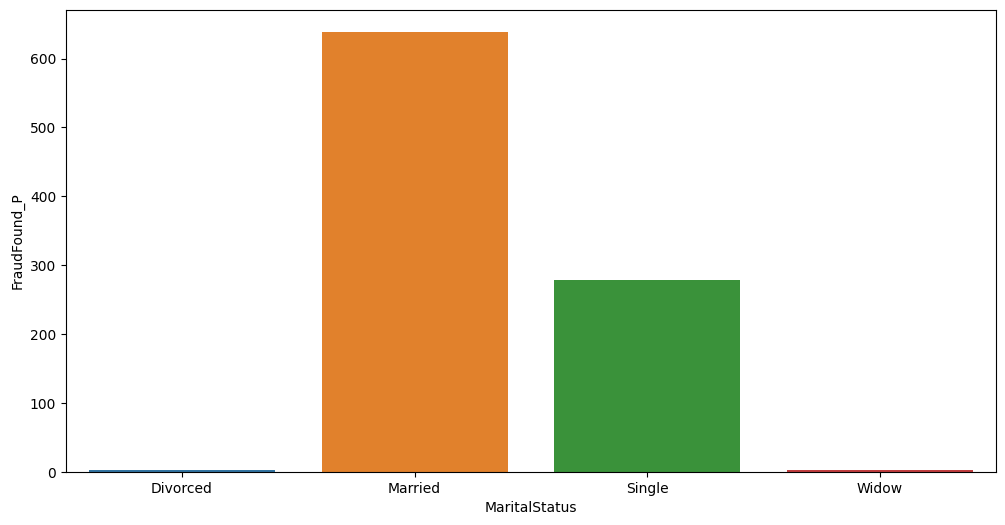

In [104]:
#plotting by FraudFound, looking to see if there are anything obvious that correlates to fraud
gpd_val1=df2.groupby('MaritalStatus').agg({'FraudFound_P':'sum'}).reset_index()
#gpd_val2=df2.groupby('MaritalStatus').agg('count').reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(12, 6))
sns.barplot(x='MaritalStatus', y='FraudFound_P', data = gpd_val1, ax=ax1)
#sns.barplot(x='MaritalStatus', y='FraudFound_P', data = gpd_val2, ax=ax2)


In [105]:
X=df2.drop('FraudFound_P',axis=1).copy()
y=df2['FraudFound_P'].copy()

In [106]:
#Encoding of variables and grouping them categorical , so to  we avoid lots of null values
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
#replaced by 1
y_val = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
#replaced by 0
x_val = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']



for i in range(len(cols)):
    X_idx1 = X[cols[i]]==y_val[i]
    X_idx2 = X[cols[i]]==x_val[i]

    X.loc[list(X_idx1),cols[i]]=1
    X.loc[list(X_idx2),cols[i]]=0

In [107]:
for i in range(len(cols)):
    X[cols[i]] = X[cols[i]].astype('int')

In [108]:
X.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea             int64
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                      int64
MaritalStatus           object
Age                      int64
Fault                    int64
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
AgeOfVehicle            object
PoliceReportFiled        int64
WitnessPresent           int64
AgentType                int64
NumberOfCars            object
Year                     int64
dtype: object

In [109]:
#we use ordinal encoder from catergory_encoders to mapp our variables.
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'Make','mapping':{'Honda':1,'Toyota':2,'BMW':3,'VW':4,'Mazda':5,'Mecedes':6,'Nisson':7,'Ford':8,'Chevrolet':9, 'Jaguar':10,' Lexus':11, 'Other':12}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'MaritalStatus','mapping':{'Married':1 ,'Single':2,'Widow':3,'Divorced':4 }},
    {'col':'PolicyType','mapping':{'Sedan - All Perils':1 ,'Sedan - Collision':2,'Sedan - Liability':3,'Sport - All Perils':4,'Sport - Collision':5,'Sport - Liability':6,'Utility - All Perils':7,'Utility - Collision':8,'Utility - Liability':9,'Other':10 }},
    {'col':'VehicleCategory','mapping':{'Sedan':1 ,'Sport ':2,'Utility ':3,'Other':4}},
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)


In [110]:
X2 = ord_encoder.fit_transform(X)

In [111]:
col_map = [{'Days_Policy_Accident':{'more than 30':31,'15 to 30':22.5,'none':0,'1 to 7':4,'8 to 15':11.5}},
    {'Days_Policy_Claim':{'more than 30':31,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
]

X3 = X2.copy()
for i in range(len(col_map)):
    X3.replace(col_map[i], inplace=True)

In [112]:
X3.dtypes

Month                     int64
WeekOfMonth               int64
DayOfWeek                 int64
Make                    float64
AccidentArea              int64
DayOfWeekClaimed          int64
MonthClaimed              int64
WeekOfMonthClaimed        int64
Sex                       int64
MaritalStatus             int64
Age                       int64
Fault                     int64
PolicyType                int64
VehicleCategory         float64
VehiclePrice              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
AgeOfVehicle              int64
PoliceReportFiled         int64
WitnessPresent            int64
AgentType                 int64
NumberOfCars            float64
Year                      int64
dtype: object

In [113]:
#this code takes our data after cleaning and splits it into the testing set and training set

X_train, X_test, y_train, y_test = train_test_split(X3, y,stratify=y, random_state=42)
clf_dt_m1 = DecisionTreeClassifier(random_state=42)
clf_dt1 = clf_dt_m1.fit(X_train, y_train)


In [121]:
y_pred_gini = clf_dt1.predict(X_test)
# Pickle model 
pd.to_pickle(clf_dt1,r'/home/lumkile/django-projects/insurance/fraudDetection/clients/fraud_model.pickle')

# Unpickle model 
clf_dt1 = pd.read_pickle(r'/home/lumkile/django-projects/insurance/fraudDetection/clients/fraud_model.pickle') 
# read a pickle pd.read_pickle('model.pkl')


# Take input from user
Month = int(input("Enter Month: "))

WeekOfMonth = int(input("Enter Week Of Month: "))

DayOfWeek = int(input("Enter Day Of Week: "))

Make= float(input("Enter Make : "))

AccidentArea  = int(input("Enter AccidentArea : "))

DayOfWeekClaimed  = int(input("Enter Day Of WeekClaimed : "))

MonthClaimed = int(input("Enter MonthClaimed: "))

WeekOfMonthClaimed = int(input("Enter WeekOfMonthClaimed: "))

Sex   = int(input("Enter Sex : "))

MaritalStatus  = int(input("Enter MaritalStatus : "))

Age  = int(input("Enter age: "))

Fault  =int(input("Enter Fault : "))

PolicyType  = int(input("Enter PolicyType : "))

VehicleCategory  = float(input("Enter VehicleCategory : "))

VehiclePrice  = int(input("Enter VehiclePrice : "))

PolicyNumber = int(input("Enter PolicyNumber: "))

RepNumber  = int(input("Enter RepNumber : "))

Deductible = int(input("Enter Deductible: "))

DriverRating  = int(input("Enter DriverRating : "))

Days_Policy_Accident  = float(input("Enter Days_Policy_Accident : "))

AgeOfVehicle = int(input("Enter AgeOfVehicle: "))

PoliceReportFiled  = int(input("Enter PoliceReportFiled : "))

WitnessPresent = int(input("Enter WitnessPresent: "))

AgentType = int(input("Enter AgentType: "))

NumberOfCars = float(input("Enter NumberOfCars: "))

Year = int(input("Enter Year: "))

result = clf_dt1.predict([[Month ,WeekOfMonth ,DayOfWeek ,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType, VehicleCategory , VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident, AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,Year   ]])  # input must be 2D array
if result==1:
    
    print("This claim Detectected as Legitemate Claim")
    
else:
    print("This claim Detectected as fradulent")

print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_test, y_pred_gini))
print("brier_score_loss:",metrics.brier_score_loss(y_test, y_pred_gini))
print("f1_score:",metrics.f1_score(y_test,y_pred_gini))
print("recall_score:",metrics.recall_score(y_test, y_pred_gini))
print("precision_score:",metrics.precision_score(y_test, y_pred_gini))
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_gini))


Enter Month: 1
Enter Week Of Month: 1
Enter Day Of Week: 1
Enter Make : 1
Enter AccidentArea : 1
Enter Day Of WeekClaimed : 1
Enter MonthClaimed: 1
Enter WeekOfMonthClaimed: 1
Enter Sex : 1
Enter MaritalStatus : 1
Enter age: 1
Enter Fault : 1
Enter PolicyType : 1
Enter VehicleCategory : 1
Enter VehiclePrice : 1
Enter PolicyNumber: 1
Enter RepNumber : 1
Enter Deductible: 1
Enter DriverRating : 1
Enter Days_Policy_Accident : 1
Enter AgeOfVehicle: 1
Enter PoliceReportFiled : 1
Enter WitnessPresent: 1
Enter AgentType: 1
Enter NumberOfCars: 1
Enter Year: 1
This claim Detectected as fradulent
Gini stats
Accuracy: 0.9146562905317769
balanced_accuracy: 0.6506282073335053
brier_score_loss: 0.08534370946822309
f1_score: 0.32993890020366595
recall_score: 0.35064935064935066
precision_score: 0.31153846153846154
roc_auc_score: 0.6506282073335053


/home/lumkile/django-projects/insurance/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Looking at the above metrics, it is clear that our tree is having trouble identifying the true positves (recall score of .372). This led me to the decision try applying some ensemble and boosting methods to get better results.

/home/lumkile/django-projects/insurance/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


True Negatives: 3445
False Postives: 179
False Negatives: 150
True Positive: 81
Recall: 0.35064935064935066
Precision: 0.31153846153846154
Prevalence: 0.05992217898832685


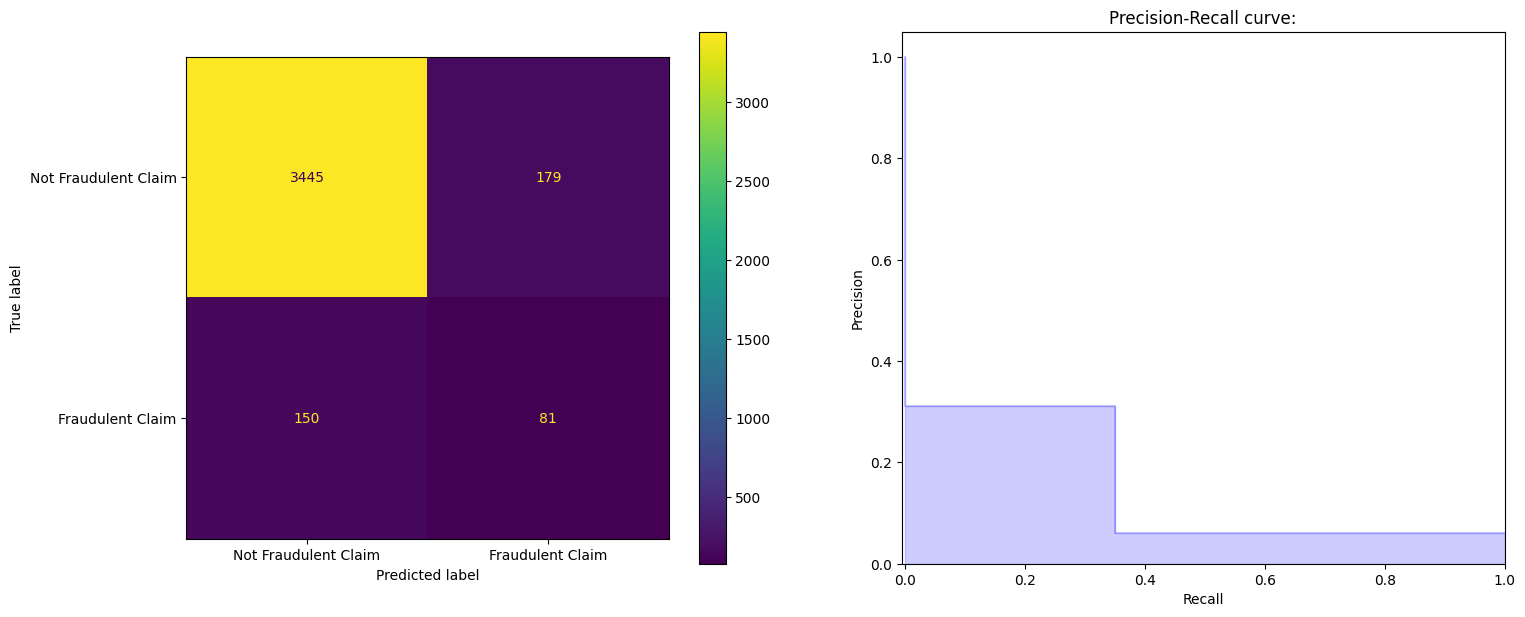

In [122]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_gini)

#this code plots the confusion matrix of our niave implementation of a decision tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(clf_dt1, X_test, y_test, display_labels=["Not Fraudulent Claim", "Fraudulent Claim"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_gini).ravel()

ax2.step(recall, precision, color='b', alpha=0.2, where='post')
ax2.fill_between(recall, precision, step='post', alpha=0.2, color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')


print('True Negatives:', tn)
print('False Postives:', fp)
print('False Negatives:', fn)
print('True Positive:', tp)
print('Recall:', tp/(fn+tp))
print('Precision:', tp/(fp+tp))
print('Prevalence:', (fn+tp)/(tn+fp+fn+tp))

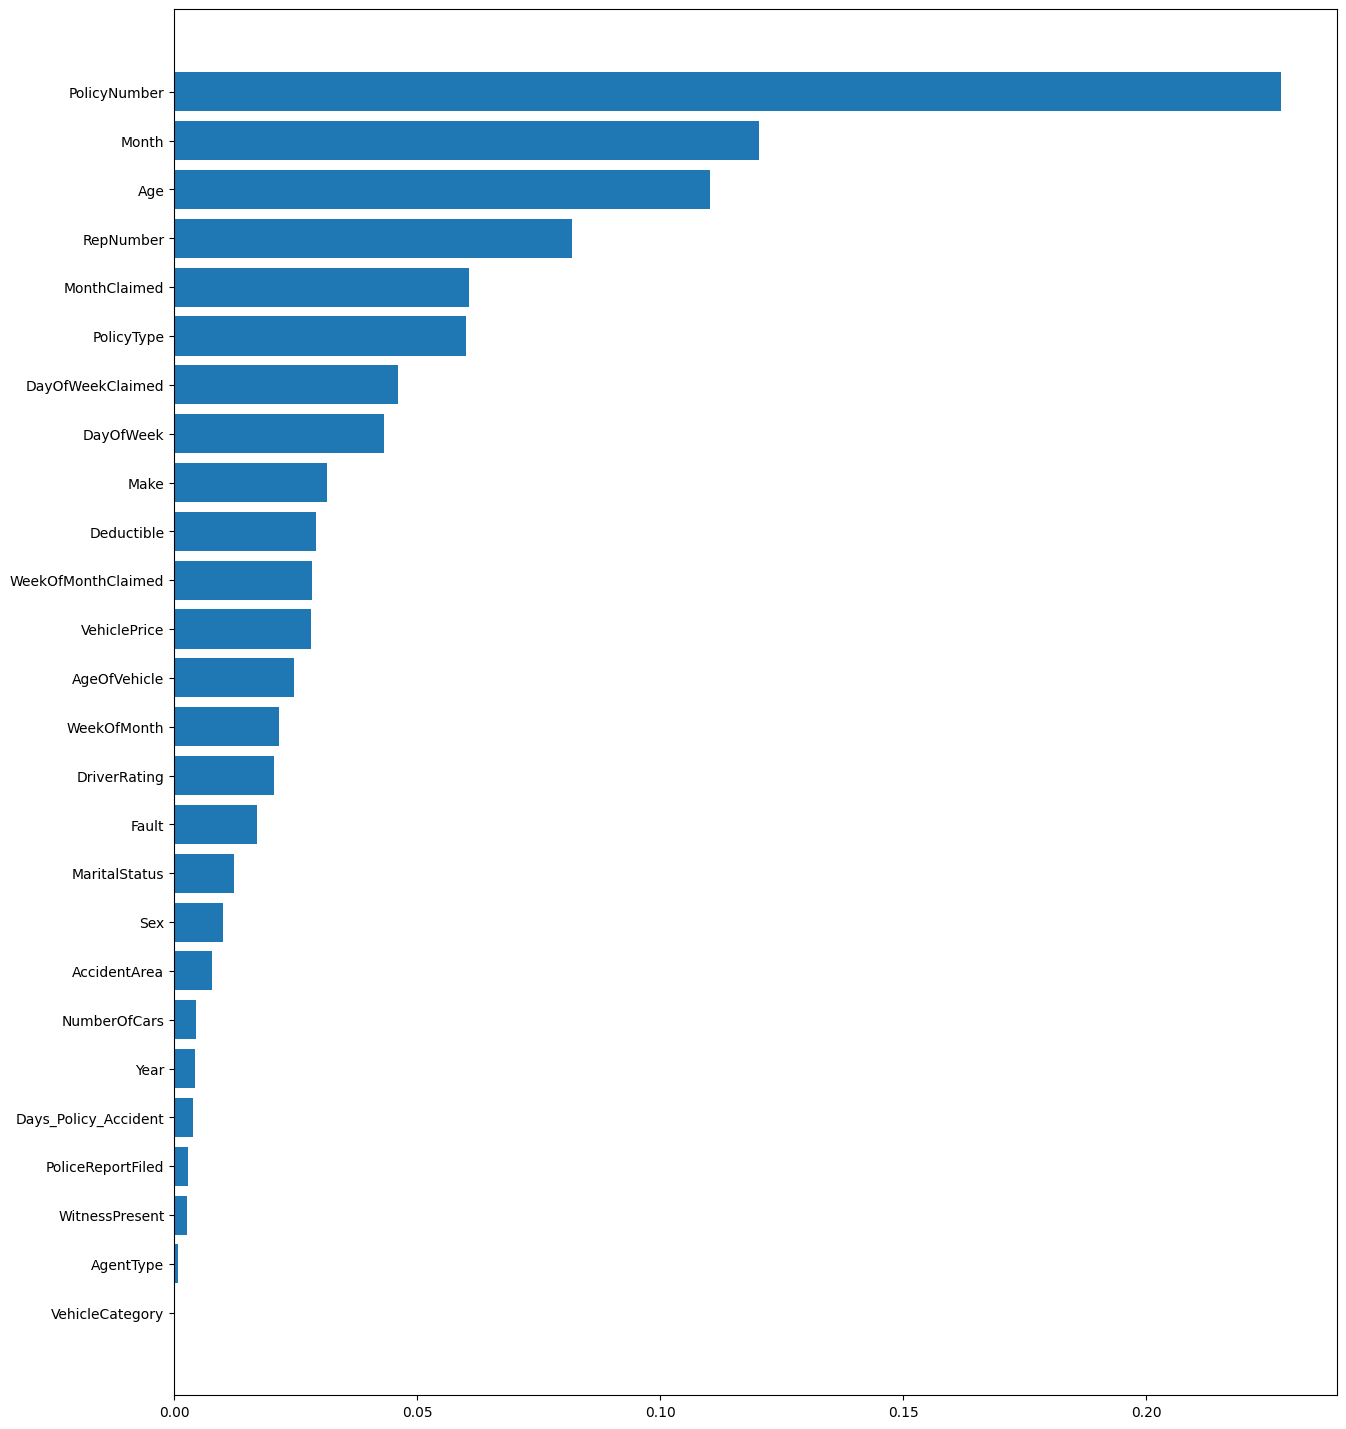

In [123]:
important_tree_features = clf_dt1.feature_importances_

indices = np.argsort(important_tree_features)

fig, ax = plt.subplots(figsize=(15, 18))
ax.barh(range(len(important_tree_features)), important_tree_features[indices])
ax.set_yticks(range(len(important_tree_features)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [126]:
classifiers = {
    "XGBClassifier": XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',eval_metric='aucpr'),
}

In [133]:
df_models = pd.DataFrame(columns = ['model', 
                                    'run_time', 
                                    'avg_accy',
                                    'avg_accy_std',  
                                    'avg_recall',
                                    'avg_recall_std',
                                    'avg_precision',
                                    'avg_precision_std',
                                    'avg_f1',
                                    'avg_f1_std',
                                    'avg_matthew_corcoef',
                                    'avg_matthew_corcoef_std',
                                    'avg_roc_auc',
                                    'avg_roc_auc_std', 
                                     ])


scorer = {'accuracy_score':metrics.make_scorer(metrics.accuracy_score),
          'f1_score':metrics.make_scorer(metrics.f1_score),
          'recall_score':metrics.make_scorer(metrics.recall_score),
          'precision_score':metrics.make_scorer(metrics.average_precision_score),
          'matthew_corrcoef':metrics.make_scorer(metrics.matthews_corrcoef),
          'roc_auc_score':metrics.make_scorer(metrics.roc_auc_score) 
         }

for key in classifiers:
    print('*', key)
    start_time = time.time()
    classifier = classifiers[key]
    model = classifier.fit(X_train,y_train)
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring = scorer)
    y_pred = model.predict(X_test)
    
    row = {
        'model': key,
        'run_time': format(round((time.time() - start_time)/60,2)),
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std(),
    }
    
    df_models = df_models.append(row, ignore_index=True)
    
    

* XGBClassifier


/tmp/ipykernel_3592/2157334808.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(row, ignore_index=True)


In [134]:
df_models.head()

,model,run_time,avg_accy,avg_accy_std,avg_recall,avg_recall_std,avg_precision,avg_precision_std,avg_f1,avg_f1_std,avg_matthew_corcoef,avg_matthew_corcoef_std,avg_roc_auc,avg_roc_auc_std
0,XGBClassifier,0.57,0.939816,0.005399,0.124155,0.045999,0.121078,0.033806,0.196375,0.067644,0.229681,0.079009,0.557983,0.023134


In [135]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_res.value_counts())

0    10872
1      692
Name: FraudFound_P, dtype: int64
0    10872
1    10872
Name: FraudFound_P, dtype: int64


In [136]:
df_models_smote = pd.DataFrame(columns = ['model', 
                                    'run_time', 
                                    'avg_accy',
                                    'avg_accy_std',  
                                    'avg_recall',
                                    'avg_recall_std',
                                    'avg_precision',
                                    'avg_precision_std',
                                    'avg_f1',
                                    'avg_f1_std',
                                    'avg_matthew_corcoef',
                                    'avg_matthew_corcoef_std',
                                    'avg_roc_auc',
                                    'avg_roc_auc_std', 
                                     ])


scorer = {'accuracy_score':metrics.make_scorer(metrics.accuracy_score),
          'f1_score':metrics.make_scorer(metrics.f1_score),
          'recall_score':metrics.make_scorer(metrics.recall_score),
          'precision_score':metrics.make_scorer(metrics.precision_score),
          'matthew_corrcoef':metrics.make_scorer(metrics.matthews_corrcoef),
          'roc_auc_score':metrics.make_scorer(metrics.roc_auc_score) 
         }

for key in classifiers:
    print('*', key)
    start_time = time.time()
    classifier = classifiers[key]
    model = classifier.fit(X_train_res,y_train_res)     #<--- pass the SMOTE generate training data set
    #scorer = metrics.make_scorer(metrics.recall_score)
    #cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring=scorer)
    cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    cv_scores = cross_validate(model, X_test, y_test, cv=cvs, scoring = scorer)   #<--- tested the SMOTE trained model on original testing data
    y_pred = model.predict(X_test)
    
    #print(model.get_params())
    
    row = {
        'model': key,
        'run_time': format(round((time.time() - start_time)/60,2)),
        'avg_accy': cv_scores['test_accuracy_score'].mean(),
        'avg_accy_std': cv_scores['test_accuracy_score'].std(),
        'avg_recall': cv_scores['test_recall_score'].mean(),
        'avg_recall_std': cv_scores['test_recall_score'].std(),
        'avg_precision': cv_scores['test_precision_score'].mean(),
        'avg_precision_std': cv_scores['test_precision_score'].std(),
        'avg_f1': cv_scores['test_f1_score'].mean(),
        'avg_f1_std': cv_scores['test_f1_score'].std(),
        'avg_matthew_corcoef': cv_scores['test_matthew_corrcoef'].mean(),
        'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
        'avg_roc_auc': cv_scores['test_roc_auc_score'].mean(),
        'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std(),
    }
    
    df_models_smote = df_models_smote.append(row, ignore_index=True)

* XGBClassifier


/tmp/ipykernel_3592/983832220.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models_smote = df_models_smote.append(row, ignore_index=True)


In [137]:
df_models.head()


,model,run_time,avg_accy,avg_accy_std,avg_recall,avg_recall_std,avg_precision,avg_precision_std,avg_f1,avg_f1_std,avg_matthew_corcoef,avg_matthew_corcoef_std,avg_roc_auc,avg_roc_auc_std
0,XGBClassifier,0.57,0.939816,0.005399,0.124155,0.045999,0.121078,0.033806,0.196375,0.067644,0.229681,0.079009,0.557983,0.023134


In [138]:
df_models_smote.head()

,model,run_time,avg_accy,avg_accy_std,avg_recall,avg_recall_std,avg_precision,avg_precision_std,avg_f1,avg_f1_std,avg_matthew_corcoef,avg_matthew_corcoef_std,avg_roc_auc,avg_roc_auc_std
0,XGBClassifier,0.6,0.939816,0.005399,0.124155,0.045999,0.531865,0.200715,0.196375,0.067644,0.229681,0.079009,0.557983,0.023134


In [139]:
space={
    'objective': 'binary:logistic',
    #objective= 'binary:logistic', 
    'use_label_encoder': False,
    #use_label_encoder= False, 
    'base_score': 0.5,
    #base_score= 0.5, 
    'booster': 'gbtree',
    #booster= 'gbtree', 
    'colsample_bylevel' : 1,
    #colsample_bylevel= 1, 
    'colsample_bynode' : 1,
    #colsample_bynode= 1, 
    'colsample_bytree' : 1,
    #colsample_bytree= 1, 
    'enable_categorical': False,
    #enable_categorical= False, 
    'gamma': hp.uniform('gamma', 0,10),
    #gamma= 0, 
    'gpu_id': -1,
    #gpu_id= -1,
    'importance_type': None,
    #importance_type= None, 
    'interaction_constraints': '',
    #interaction_constraints= '', 
    'learning_rate': 0.300000012,
    #learning_rate= 0.300000012, 
    'max_delta_step': 0,
    #max_delta_step= 0, 
    'max_depth': hp.randint("max_depth", 10)+3,
    #max_depth= 6, 
    'min_child_weight' : hp.randint('min_child_weight', 4)+1,
    #min_child_weight= 1, 
    #missing= 'nan', 
    'monotone_constraints': '()',
    #monotone_constraints= '()',
    'n_estimators': hp.randint('n_estimators', 150)+50,
    #n_estimators= 100, 
    'n_jobs': 4,
    #n_jobs= 4, 
    'num_parallel_tree':1,
    #num_parallel_tree= 1, 
    'predictor':'auto',
    #predictor= 'auto', 
    'random_state': 0,
    #random_state= 0, 
    'reg_alpha' : hp.randint('reg_alpha', 10),
    #reg_alpha= 0, 
    'reg_lambda' : hp.randint('reg_lambda', 10),
    #reg_lambda= 1, 
    'scale_pos_weight': 1,
    #scale_pos_weight= 1, 
    'subsample': 1,
    #subsample= 1, 
    'tree_method': 'exact',
    #tree_method= 'exact', 
    'validate_parameters':1,
    #validate_parameters= 1, 
    'verbosity': None,
    #verbosity= None, 
    'eval_metric': 'aucpr'
    #eval_metric= 'aucpr'
    }


NameError: name 'hp' is not defined

In [140]:
high_roc_scores = {}
#model_num = 0

def objective(space):
    #model_num +=1
    clf_model=XGBClassifier(**space)
    fitted_model=clf_model.fit(X_train, y_train)
    pred = fitted_model.predict(X_test)
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1 = metrics.f1_score(y_test,pred)
    matthew_corrcoef = metrics.matthews_corrcoef(y_test,pred),
    roc_auc = metrics.roc_auc_score(y_test,pred)
    avg_precision = metrics.average_precision_score(y_test, pred)
    
    rows = {'model': ' XGBClassifier',
        'tp': [tp],
        'tn': [tn],
        'fp': [fp],
        'fn': [fn],
        'accuracy': [round(accuracy,3)],
        'precision': [round(precision,3)],
        'recall':[ round(recall,3)],
        'f1': [round(f1,3)],
        'matthews_coef': [round(matthew_corrcoef[0],3)],
        'roc_auc': [round(roc_auc,3)],
        'avg_pre': [round(avg_precision,3)],
    }
     
    score_vals = pd.DataFrame(rows)
    print(tabulate(score_vals, headers=score_vals.columns))
    print(' ')
    if round(roc_auc,3)>0.7:
        high_roc_scores['Trial_model_{}'.format(time.time())]= [fitted_model.get_params(), score_vals]
        print(' ')
        print(fitted_model.get_params())
        print(' ')
        print(' ')
        print(' ')
    
    return {'loss': -roc_auc, 'status': STATUS_OK }

In [141]:
trials=Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                       trials=trials)

NameError: name 'Trials' is not defined

In [142]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

print("Record best are:", "\n")
print(high_roc_scores)

The best hyperparameters are :  



NameError: name 'best_hyperparams' is not defined

In [143]:
clf_optimal = XGBClassifier(
    objective= 'binary:logistic', 
    use_label_encoder= False, 
    base_score= 0.5, 
    booster= 'gbtree', 
    colsample_bylevel= 1, 
    colsample_bynode= 1, 
    colsample_bytree= 1, 
    enable_categorical= False, 
    gamma= best_hyperparams['gamma'], 
    gpu_id= -1, 
    importance_type= None, 
    interaction_constraints= '', 
    learning_rate= 0.300000012, 
    max_delta_step= 0, 
    max_depth= best_hyperparams['max_depth'], 
    min_child_weight= best_hyperparams['min_child_weight'], 
   # missing= 'nan', 
    monotone_constraints= '()',
    n_estimators= best_hyperparams['n_estimators'], 
    n_jobs= 4, 
    num_parallel_tree= 1, 
    predictor= 'auto', 
    random_state= 0, 
    reg_alpha= best_hyperparams['reg_alpha'], 
    reg_lambda= best_hyperparams['reg_lambda'], 
    scale_pos_weight= 1, 
    subsample= 1, 
    tree_method= 'exact', 
    validate_parameters= 1, 
    verbosity= None, 
    eval_metric= 'aucpr'
)

NameError: name 'best_hyperparams' is not defined

In [144]:
print(clf_optimal.get_params())

NameError: name 'clf_optimal' is not defined

In [ ]:

start_time = time.time()
optimal_model = clf_optimal.fit(X_train,y_train)

# set random_state = 42
#The idea was, if I have the optimal parameters, then using the same cross-validation state as during my initial testing
#should produce far better results.... it didn't   :**(

cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_validate(optimal_model, X_test, y_test, cv=cvs, scoring = scorer)
y_pred_optimal = optimal_model.predict(X_test)

row2 = {'model': ['Optimized XGBClassifier'],
       'run_time': [format(round((time.time() - start_time)/60,2))],
       'avg_accy': [cv_scores['test_accuracy_score'].mean()],
       #'avg_accy_std': cv_scores['test_accuracy_score'].std(),
       'avg_recall': [cv_scores['test_recall_score'].mean()],
       #'avg_recall_std': cv_scores['test_recall_score'].std(),
       'avg_precision': [cv_scores['test_precision_score'].mean()],
       #'avg_precision_std': cv_scores['test_precision_score'].std(),
       'avg_f1': [cv_scores['test_f1_score'].mean()],
       #'avg_f1_std': cv_scores['test_f1_score'].std(),
       'avg_matthew_corcoef': [cv_scores['test_matthew_corrcoef'].mean()],
       #'avg_matthew_corcoef_std': cv_scores['test_matthew_corrcoef'].std(),
       'avg_roc_auc':[ cv_scores['test_roc_auc_score'].mean()],
       #'avg_roc_auc_std': cv_scores['test_roc_auc_score'].std(),
      }
 
scores2 = pd.DataFrame(row2)
print(tabulate(scores2, headers=scores2.columns))
#df_models = df_models.append(row, ignore_index=True)

In [ ]:
cv_scores

In [ ]:
cv_idx =list(range(len(cv_scores['fit_time'])))

fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(6)
for test_score in cv_scores.keys():
    if (test_score !='fit_time') & (test_score !='score_time'):
        plt.plot(cv_idx, cv_scores[test_score], label='{}'.format(test_score))
    
plt.legend(loc='upper right')

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_optimal).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred_optimal)
precision = metrics.precision_score(y_test, y_pred_optimal)
recall = metrics.recall_score(y_test, y_pred_optimal)
f1 = metrics.f1_score(y_test,y_pred_optimal)
matthew_corrcoef = metrics.matthews_corrcoef(y_test,y_pred_optimal),
roc_auc = metrics.roc_auc_score(y_test,y_pred_optimal)
avg_precision = metrics.average_precision_score(y_test, y_pred_optimal)

row3 = {'model': 'Optimized XGB-No SMOTE',
        'tp': [tp],
        'tn': [tn],
        'fp': [fp],
        'fn': [fn],
        'correct': [tp+tn],
        'incorrect': [fp+fn],
        'accuracy': [round(accuracy,3)],
        'precision': [round(precision,3)],
        'recall': [round(recall,3)],
        'f1': [round(f1,3)],
        'matthews_coef': [round(matthew_corrcoef[0],3)],
        'roc_auc': [round(roc_auc,3)],
        'avg_pre': [round(avg_precision,3)],
    }

scores3 = pd.DataFrame(row3)
print(tabulate(scores3, headers=scores3.columns))



In [ ]:
for key in cv_scores.keys():
    print('key {}:score {}'.format(key,cv_scores[key][-1] ))

In [ ]:
high_roc_scores

In [ ]:
potential_opt_params = pd.DataFrame(columns = ['gamma', 
                                              'max_depth', 
                                              'min_child_weight',
                                              'n_estimators', 
                                              'reg_alpha', 
                                              'reg_lambda',
                                              'precision',
                                              'recall',
                                              'f1',
                                              'matthews_coef',
                                              'roc_auc'])

row_idx = 0
for key in high_roc_scores.keys():
    param_dict = high_roc_scores[key]
    #print(key)
    
    temp1 = param_dict[0]
    temp2 = param_dict[1]
    for param in potential_opt_params.columns:
        if param in temp1.keys():
            potential_opt_params.at[row_idx, param] = temp1[param]
        elif param in temp2.columns:
            potential_opt_params.at[row_idx, param] = temp2[param]
    
    row_idx = row_idx + 1

    
#sort value isnt working at the moment returns the following error
# 
#The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#potential_opt_params.sort_values('roc_auc',axis = 0,ascending=False, inplace=True)
print(tabulate(potential_opt_params, headers=potential_opt_params.columns))

In [ ]:
#not sortin
potential_opt_params.iloc[0]['gamma']

In [ ]:
clf_optimal2 = XGBClassifier(
    objective= 'binary:logistic', 
    use_label_encoder= False, 
    base_score= 0.5, 
    booster= 'gbtree', 
    colsample_bylevel= 1, 
    colsample_bynode= 1, 
    colsample_bytree= 1, 
    enable_categorical= False, 
    gamma= potential_opt_params.iloc[0]['gamma'], 
    gpu_id= -1, 
    importance_type= None, 
    interaction_constraints= '', 
    learning_rate= 0.300000012, 
    max_delta_step= 0, 
    max_depth= potential_opt_params.iloc[0]['max_depth'], 
    min_child_weight= potential_opt_params.iloc[0]['min_child_weight'], 
   # missing= 'nan', 
    monotone_constraints= '()',
    n_estimators= potential_opt_params.iloc[0]['n_estimators'], 
    n_jobs= 4, 
    num_parallel_tree= 1, 
    predictor= 'auto', 
    random_state= 0, 
    reg_alpha= potential_opt_params.iloc[0]['reg_alpha'], 
    reg_lambda= potential_opt_params.iloc[0]['reg_lambda'], 
    scale_pos_weight= 1, 
    subsample= 1, 
    tree_method= 'exact', 
    validate_parameters= 1, 
    verbosity= None, 
    eval_metric= 'aucpr'
)

In [ ]:

start_time = time.time()
optimal_model2 = clf_optimal2.fit(X_train,y_train)

# set random_state = 42
#The idea was, if I have the optimal parameters, then using the same cross-validation state as during my initial testing
#should produce far better results.... it didn't   :**(

cvs = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores2 = cross_validate(optimal_model2, X_test, y_test, cv=cvs, scoring = scorer)
y_pred_optimal2 = optimal_model2.predict(X_test)

row4 = {'model': ['Optimized XGBClassifier'],
       'run_time': [format(round((time.time() - start_time)/60,2))],
       'avg_accy': [cv_scores2['test_accuracy_score'].mean()],
       #'avg_accy_std': cv_scores2['test_accuracy_score'].std(),
       'avg_recall': [cv_scores2['test_recall_score'].mean()],
       #'avg_recall_std': cv_scores2['test_recall_score'].std(),
       'avg_precision': [cv_scores2['test_precision_score'].mean()],
       #'avg_precision_std': cv_scores2['test_precision_score'].std(),
       'avg_f1': [cv_scores2['test_f1_score'].mean()],
       #'avg_f1_std': cv_scores2['test_f1_score'].std(),
       'avg_matthew_corcoef': [cv_scores2['test_matthew_corrcoef'].mean()],
       #'avg_matthew_corcoef_std': cv_scores2['test_matthew_corrcoef'].std(),
       'avg_roc_auc':[ cv_scores2['test_roc_auc_score'].mean()],
       #'avg_roc_auc_std': cv_scores2['test_roc_auc_score'].std(),
      }
 
scores4 = pd.DataFrame(row4)
print(tabulate(scores4, headers=scores4.columns))
#df_models = df_models.append(row, ignore_index=True)

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_optimal2).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred_optimal2)
precision = metrics.precision_score(y_test, y_pred_optimal2)
recall = metrics.recall_score(y_test, y_pred_optimal2)
f1 = metrics.f1_score(y_test,y_pred_optimal2)
matthew_corrcoef = metrics.matthews_corrcoef(y_test,y_pred_optimal2),
roc_auc = metrics.roc_auc_score(y_test,y_pred_optimal2)
avg_precision = metrics.average_precision_score(y_test, y_pred_optimal2)

row5 = {'model': 'Optimized XGB-No SMOTE',
        'tp': [tp],
        'tn': [tn],
        'fp': [fp],
        'fn': [fn],
        'correct': [tp+tn],
        'incorrect': [fp+fn],
        'accuracy': [round(accuracy,3)],
        'precision': [round(precision,3)],
        'recall': [round(recall,3)],
        'f1': [round(f1,3)],
        'matthews_coef': [round(matthew_corrcoef[0],3)],
        'roc_auc': [round(roc_auc,3)],
        'avg_pre': [round(avg_precision,3)],
    }

scores5 = pd.DataFrame(row3)
print(tabulate(scores5, headers=scores5.columns))

In [ ]:
precision_opt2, recall_opt2, thresholds = metrics.precision_recall_curve(y_test, y_pred_optimal2)

#this code plots the confusion matrix of our niave implementation of a decision tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.tight_layout(pad=5.0)
metrics.plot_confusion_matrix(optimal_model2, X_test, y_test, display_labels=["Not Fraudulent Claim", "Fraudulent Claim"], ax=ax1)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_optimal2).ravel()

ax2.step(recall_opt2, precision_opt2, color='b', alpha=0.2, where='post')
ax2.fill_between(recall_opt2, precision_opt2, step='post', alpha=0.2, color='b')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_ylim([0.0, 1.05])
ax2.set_xlim([-0.005, 1.0])
ax2.set_title('Precision-Recall curve:')

In [ ]:
plot_importance(optimal_model2, max_num_features=15)

